### Step 1: Import libraries 

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

os.chdir('..')

### Step 2: Reading dataset

In [2]:
leads_data = pd.read_csv("data/raw/leads.csv")
offers_data = pd.read_csv("data/raw/offers.csv")

### Step 3: Analyze data

In [3]:
print("LEADS DATA \n", leads_data.head())

LEADS DATA 
          Id       First Name          Use Case   Source     Status  \
0  23okrabh              NaN  Corporate Events  Inbound  Nurturing   
1       NaN  Taylor1 Harris1               NaN  Inbound  Discarded   
2  hbzt0kp1   Alex6 Jackson3               NaN  Inbound  Nurturing   
3  velluwdq  Bailey2 Taylor6  Corporate Events  Inbound  Discarded   
4       NaN    Drew5 Wilson5  Corporate Events  Inbound  Nurturing   

  Discarded/Nurturing Reason    Acquisition Campaign Created Date  Converted  \
0                    Not Fit                     NaN   2018-05-26          0   
1                Not feeling  Event Management Guide   2018-10-17          0   
2                 Competitor                     NaN   2019-03-29          0   
3                 Not Target                     NaN   2018-05-26          0   
4                 Competitor                     NaN   2018-10-17          0   

      City  
0  Chicago  
1   Denver  
2   Denver  
3      NaN  
4      NaN  


In [4]:
print("OFFERS DATA \n", offers_data.head())

OFFERS DATA 
          Id              Use Case       Status Created Date  Close Date  \
0  doqyhjtv  Educational Seminars   Closed Won   2019-11-17  2019-11-17   
1       NaN         Sports Events  Closed Lost   2019-11-24  2019-11-25   
2       NaN         Sports Events  Closed Lost   2019-11-24  2019-11-25   
3  cturqi48      Corporate Events   Closed Won   2019-05-07  2019-05-07   
4       NaN         Sports Events  Closed Lost   2019-11-17  2019-11-25   

   Price    Discount code               Pain  Loss Reason  
0  300.0       SAVEMORE50         operations          NaN  
1  150.0              NaN         operations        price  
2  768.0      HALFYEAR20G         operations  no response  
3  240.0  DISCOUNT50POWER  financial control          NaN  
4  240.0     SAVEMONTH50G  financial control  no response  


In [5]:
print("LEADS DATA \n")
print(leads_data.shape)
print(leads_data.info())

LEADS DATA 

(61639, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61639 entries, 0 to 61638
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Id                          43972 non-null  object
 1   First Name                  53240 non-null  object
 2   Use Case                    44918 non-null  object
 3   Source                      60293 non-null  object
 4   Status                      61639 non-null  object
 5   Discarded/Nurturing Reason  45169 non-null  object
 6   Acquisition Campaign        25047 non-null  object
 7   Created Date                61639 non-null  object
 8   Converted                   61639 non-null  int64 
 9   City                        34929 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.7+ MB
None


We can see that there are lot of categorical columns available in our data. We have 1 column with int values and 9 columns with categorical values.

However, there's 'Created Date' that could be a datetimes column.

In [6]:
print("OFFERS DATA \n")
print(offers_data.shape)
print(offers_data.info())

OFFERS DATA 

(6130, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4962 non-null   object 
 1   Use Case       6093 non-null   object 
 2   Status         6130 non-null   object 
 3   Created Date   6130 non-null   object 
 4   Close Date     6130 non-null   object 
 5   Price          5765 non-null   float64
 6   Discount code  4431 non-null   object 
 7   Pain           5261 non-null   object 
 8   Loss Reason    2364 non-null   object 
dtypes: float64(1), object(8)
memory usage: 431.1+ KB
None


We can see that there are lot of categorical columns available in our data. We have 1 column with float values and 8 columns with categorical values.

However, there're 'Created Date' and 'Close Date' that could be a datetimes column.

In [7]:
# Get the number of missing records in each column
print("Missing values - LEADS DATA\n")
print("** Real values ** \n", leads_data.isnull().sum())
print()
print("** Percentages ** \n", ((leads_data.isnull().sum()/(len(leads_data)))*100).sort_values(ascending = False))

Missing values - LEADS DATA

** Real values ** 
 Id                            17667
First Name                     8399
Use Case                      16721
Source                         1346
Status                            0
Discarded/Nurturing Reason    16470
Acquisition Campaign          36592
Created Date                      0
Converted                         0
City                          26710
dtype: int64

** Percentages ** 
 Acquisition Campaign          59.365012
City                          43.332955
Id                            28.662048
Use Case                      27.127306
Discarded/Nurturing Reason    26.720096
First Name                    13.626113
Source                         2.183682
Status                         0.000000
Created Date                   0.000000
Converted                      0.000000
dtype: float64


<Axes: title={'center': 'Null Values Plot'}>

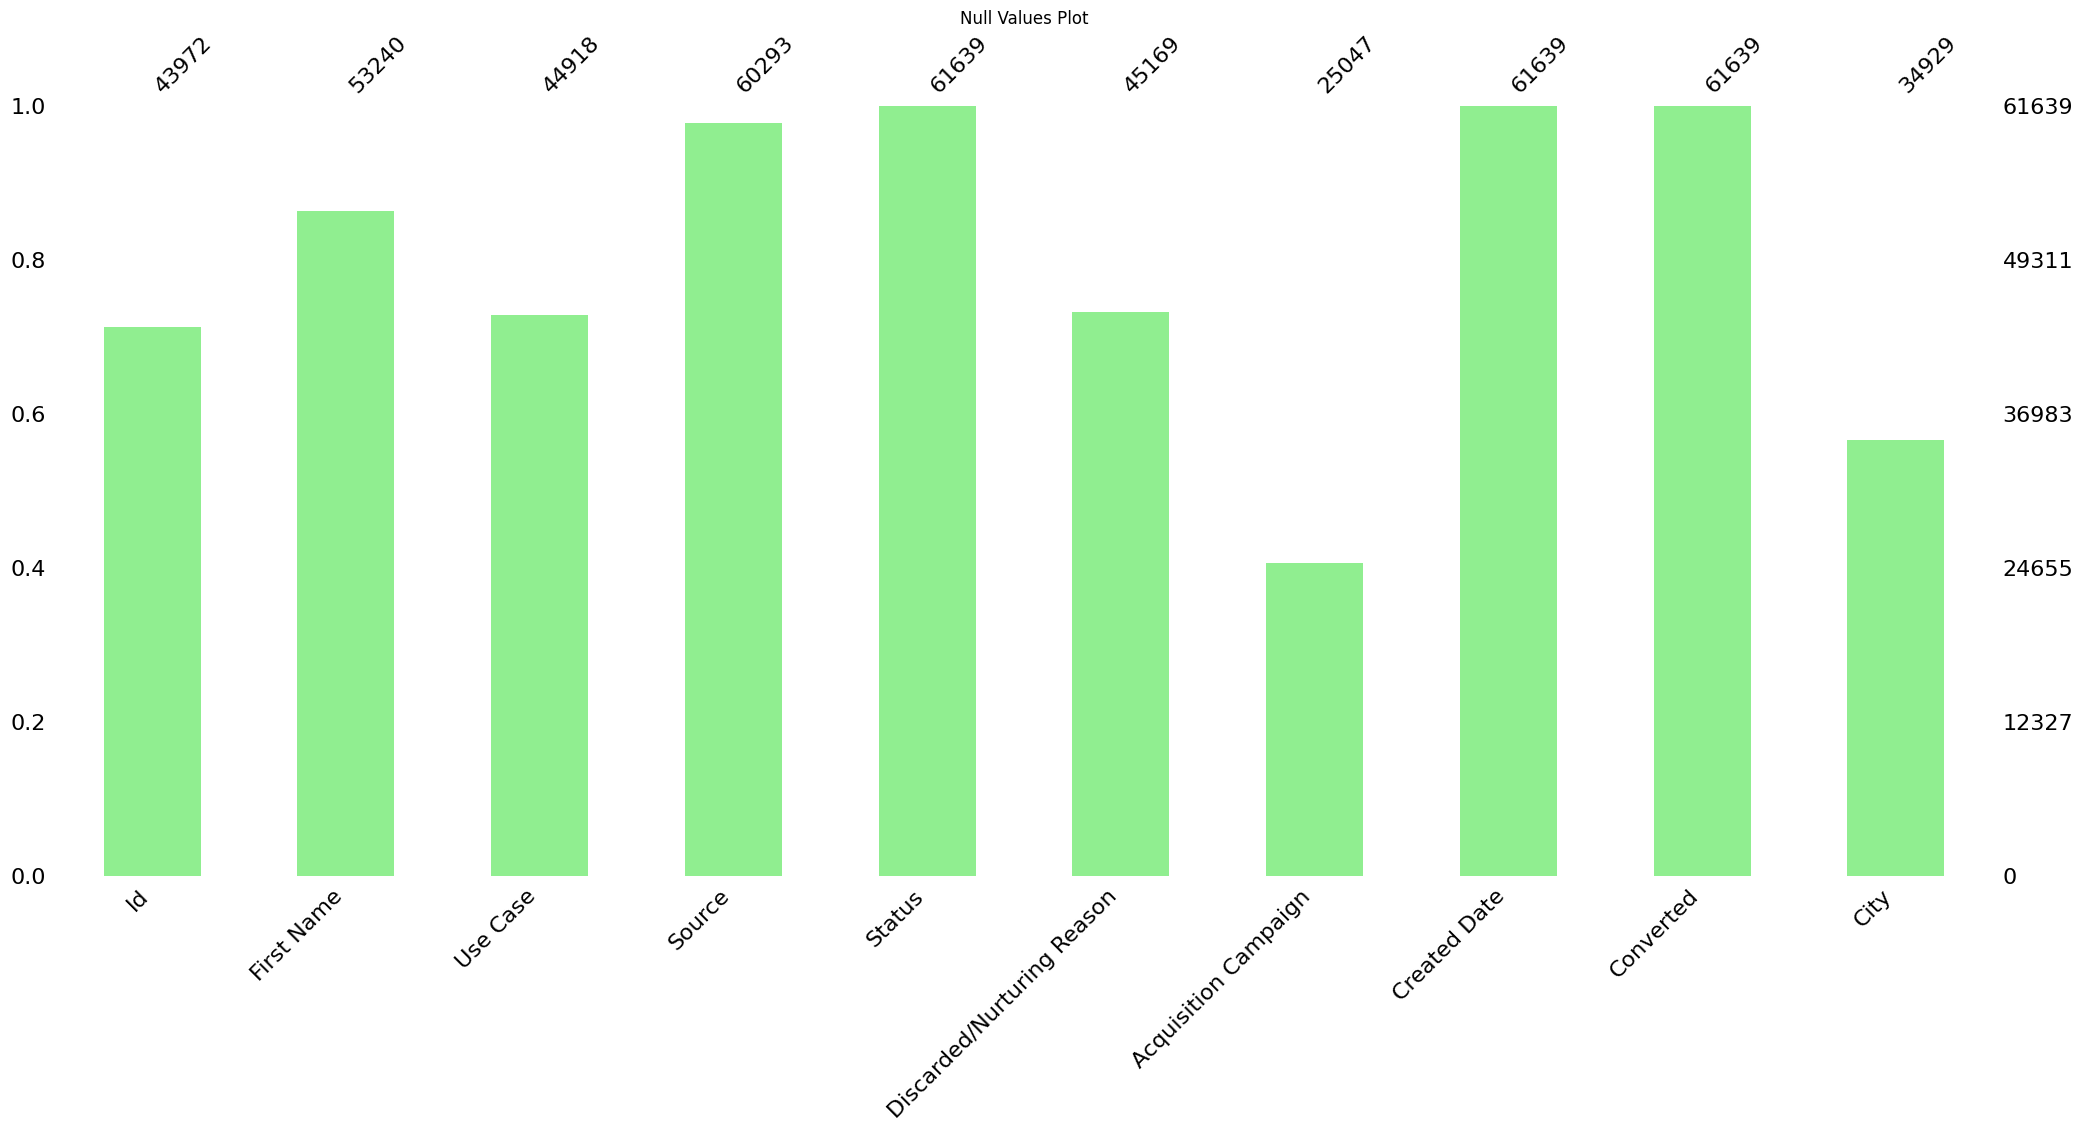

In [8]:
plt.title("Null Values Plot")
ms.bar(leads_data, color = 'lightgreen')

In [9]:
# Calculate the percentage of missing values in each column
print("Missing values - OFFERS DATA \n", )
print("** Real values ** \n", offers_data.isnull().sum())
print()
print("** Percentages ** \n", ((offers_data.isnull().sum()/(len(offers_data)))*100).sort_values(ascending = False))

Missing values - OFFERS DATA 

** Real values ** 
 Id               1168
Use Case           37
Status              0
Created Date        0
Close Date          0
Price             365
Discount code    1699
Pain              869
Loss Reason      3766
dtype: int64

** Percentages ** 
 Loss Reason      61.435563
Discount code    27.716150
Id               19.053834
Pain             14.176183
Price             5.954323
Use Case          0.603589
Status            0.000000
Created Date      0.000000
Close Date        0.000000
dtype: float64


<Axes: title={'center': 'Null Values Plot'}>

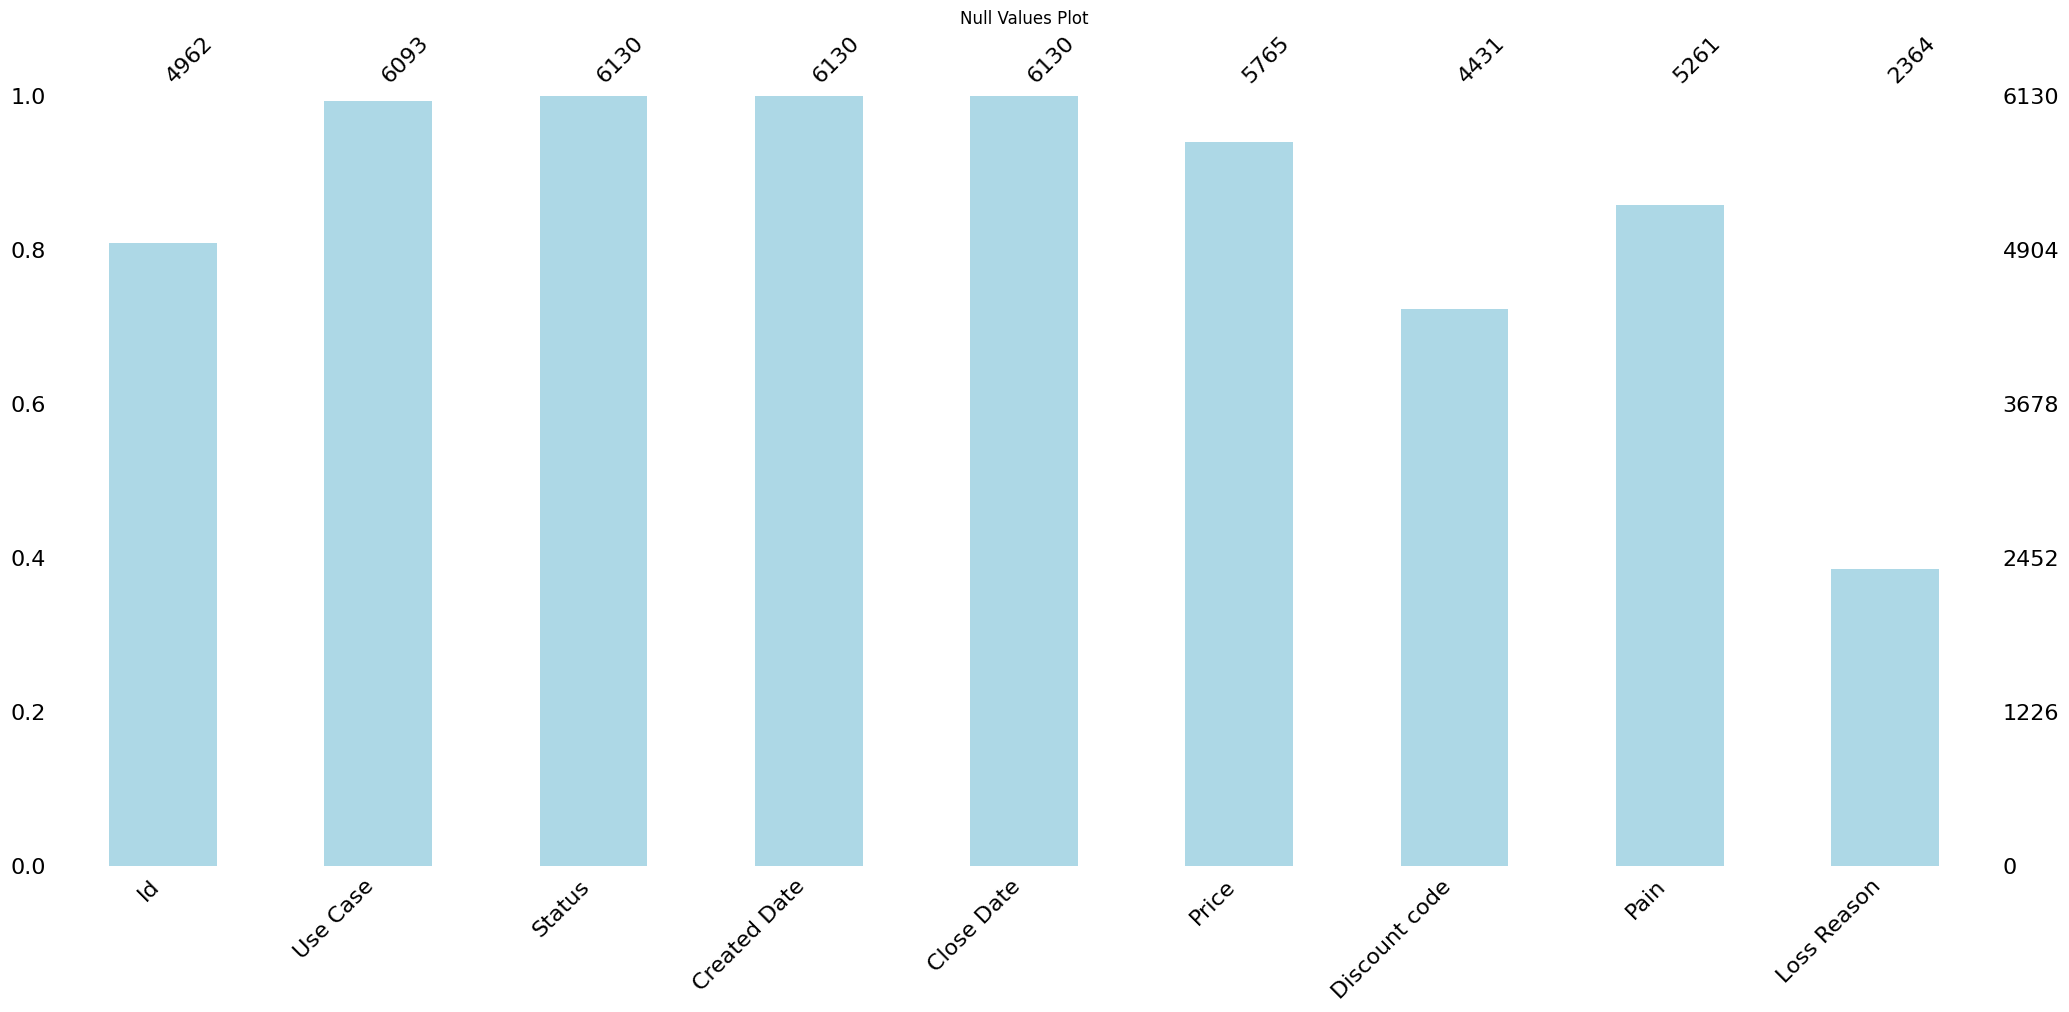

In [10]:
plt.title("Null Values Plot")
ms.bar(offers_data, color = 'lightblue')

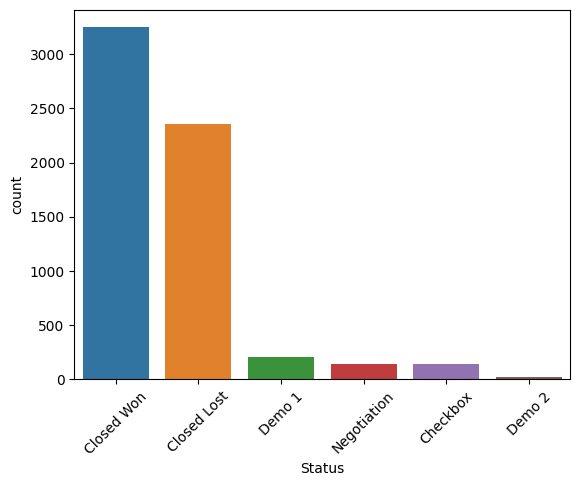

In [11]:
sns.countplot(x='Status', data=offers_data)
plt.xticks(rotation=45)
plt.show()

As we can see here there're lot of null values present so if we try to impute or interpolate the data will not be an ideal way in case if there are many null values available in your data.

It's better to exclude that column to avoid randomness & bias in our model.

### Step 4: Feature Engineering

In [12]:
# Delete rows with null values in the 'Id' column of the Leads dataset
leads_data_cleaned = leads_data.dropna(subset=['Id'])

# Drop multiple columns
# 'First Name' is irrelevant
# The columns of Leads dataset such as 'Use Case' and 'Created Date' are the same as the columns of Offers dataset
# The 'Status' and 'Converted' columns of Leads dataset refers to the 'Status' column of Offers dataset
leads_data_cleaned = leads_data_cleaned.drop(['First Name', 'Use Case', 'Created Date', 'Status', 'Converted'], axis = 1)

leads_data_cleaned.to_csv("data/interim/leads_data_cleaned.csv", index=False)
print(leads_data_cleaned.head())

         Id   Source Discarded/Nurturing Reason Acquisition Campaign     City
0  23okrabh  Inbound                    Not Fit                  NaN  Chicago
2  hbzt0kp1  Inbound                 Competitor                  NaN   Denver
3  velluwdq  Inbound                 Not Target                  NaN      NaN
5  vwm9vcdc  Inbound       Not the right moment                  NaN      NaN
8  kbfjr4vz  Inbound                Not feeling                  NaN   Denver


In [13]:
((leads_data_cleaned.isnull().sum()/(len(leads_data_cleaned)))*100).sort_values(ascending = False)

Acquisition Campaign          59.792595
City                          31.401801
Discarded/Nurturing Reason    22.157282
Source                         0.063677
Id                             0.000000
dtype: float64

In [14]:
# Merge the datasets using the 'Id' column as a key
full_dataset = pd.merge(offers_data, leads_data_cleaned, on='Id', how='left')

print("Merged Data:")
print(full_dataset.head())
full_dataset.to_csv("data/interim/full_dataset.csv", index=False)

Merged Data:
         Id              Use Case       Status Created Date  Close Date  \
0  doqyhjtv  Educational Seminars   Closed Won   2019-11-17  2019-11-17   
1       NaN         Sports Events  Closed Lost   2019-11-24  2019-11-25   
2       NaN         Sports Events  Closed Lost   2019-11-24  2019-11-25   
3  cturqi48      Corporate Events   Closed Won   2019-05-07  2019-05-07   
4       NaN         Sports Events  Closed Lost   2019-11-17  2019-11-25   

   Price    Discount code               Pain  Loss Reason   Source  \
0  300.0       SAVEMORE50         operations          NaN      NaN   
1  150.0              NaN         operations        price      NaN   
2  768.0      HALFYEAR20G         operations  no response      NaN   
3  240.0  DISCOUNT50POWER  financial control          NaN  Inbound   
4  240.0     SAVEMONTH50G  financial control  no response      NaN   

  Discarded/Nurturing Reason Acquisition Campaign       City  
0                        NaN                  NaN   

In [15]:
print(full_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          4962 non-null   object 
 1   Use Case                    6093 non-null   object 
 2   Status                      6130 non-null   object 
 3   Created Date                6130 non-null   object 
 4   Close Date                  6130 non-null   object 
 5   Price                       5765 non-null   float64
 6   Discount code               4431 non-null   object 
 7   Pain                        5261 non-null   object 
 8   Loss Reason                 2364 non-null   object 
 9   Source                      3799 non-null   object 
 10  Discarded/Nurturing Reason  33 non-null     object 
 11  Acquisition Campaign        1043 non-null   object 
 12  City                        2521 non-null   object 
dtypes: float64(1), object(12)
memory 

In [16]:
((full_dataset.isnull().sum()/(len(full_dataset)))*100).sort_values(ascending = False)

Discarded/Nurturing Reason    99.461664
Acquisition Campaign          82.985318
Loss Reason                   61.435563
City                          58.874388
Source                        38.026101
Discount code                 27.716150
Id                            19.053834
Pain                          14.176183
Price                          5.954323
Use Case                       0.603589
Status                         0.000000
Created Date                   0.000000
Close Date                     0.000000
dtype: float64

<Axes: title={'center': 'Null Values Plot'}>

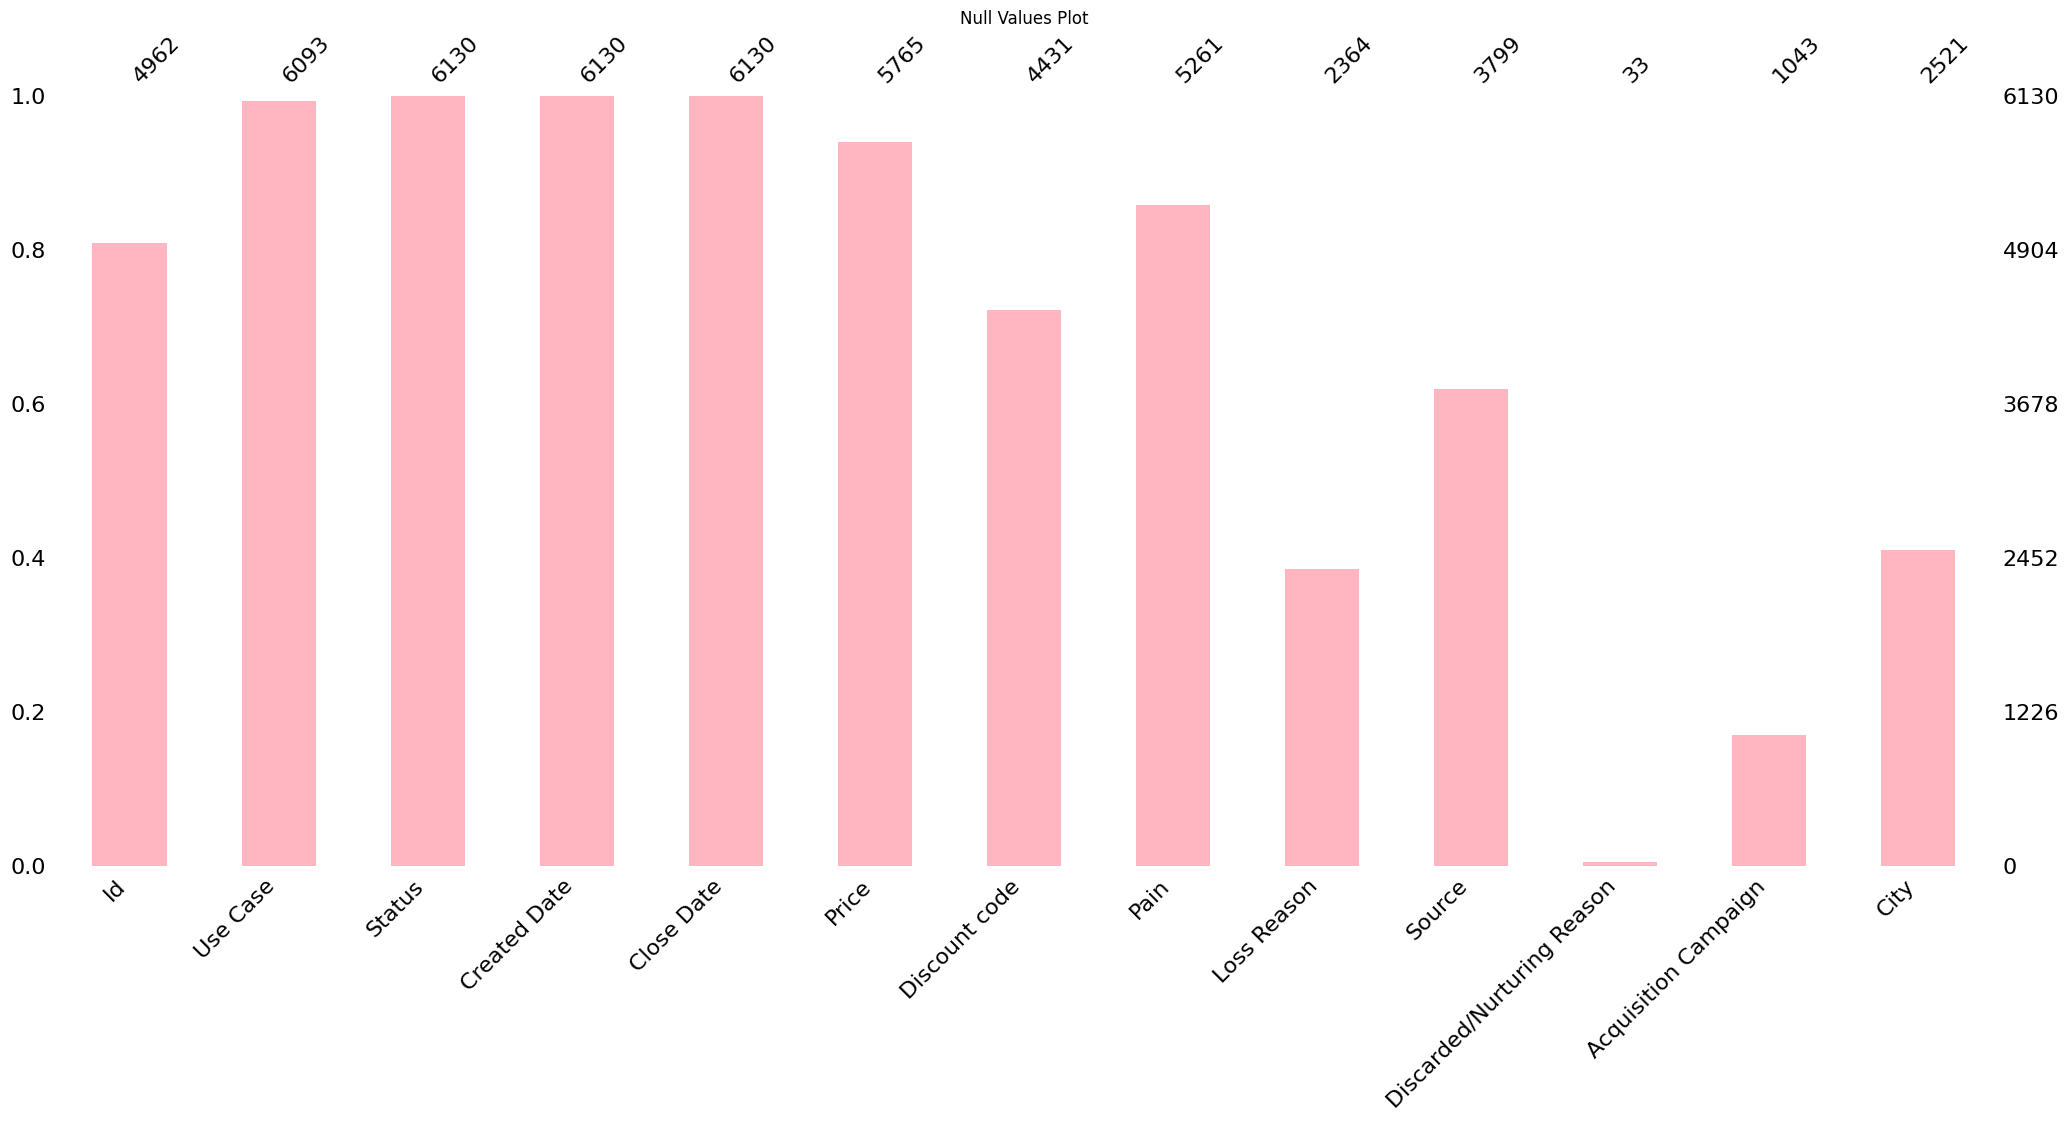

In [17]:
plt.title("Null Values Plot")
ms.bar(full_dataset, color = 'lightpink')

In [18]:
# Drop multiple columns
# 'Id' is irrelevant
# 'Discarded/Nurturing Reason' and 'Acquisition Campaign' have more than 80% null values.
# The missing data is significant and may not provide valuable information for the model.
full_dataset_preprocessed = full_dataset.drop(['Id', 'Discarded/Nurturing Reason', 'Acquisition Campaign'], axis = 1)

In [19]:
# Fill null values with mode
full_dataset_preprocessed['Use Case'].fillna(full_dataset_preprocessed['Use Case'].mode()[0], inplace=True)
full_dataset_preprocessed['Discount code'].fillna(full_dataset_preprocessed['Discount code'].mode()[0], inplace=True)
full_dataset_preprocessed['Pain'].fillna(full_dataset_preprocessed['Pain'].mode()[0], inplace=True)
full_dataset_preprocessed['City'].fillna(full_dataset_preprocessed['City'].mode()[0], inplace=True)
full_dataset_preprocessed['Source'].fillna(full_dataset_preprocessed['Source'].mode()[0], inplace=True)

In [20]:
se_median = SimpleImputer(missing_values = np.nan, strategy='median')
full_dataset_preprocessed[['Price']] = se_median.fit_transform(full_dataset_preprocessed[['Price']])

In [21]:
# Fill null values in 'Loss Reason'
# If 'Status' is 'Closed Lost', fill in 'no response'
full_dataset_preprocessed['Loss Reason'] = np.where((full_dataset_preprocessed['Status'] == 'Closed Lost') & (full_dataset_preprocessed['Loss Reason'].isnull()), 'no response', full_dataset_preprocessed['Loss Reason'])

# If 'Status' is 'Closed Won', fill with 'Loss Reason' mode fora 'Closed Won'
mode_closed_won = full_dataset_preprocessed.loc[full_dataset_preprocessed['Status'] == 'Closed Won', 'Loss Reason'].mode()[0]
full_dataset_preprocessed['Loss Reason'].fillna(mode_closed_won, inplace=True)

<Axes: title={'center': 'Null Values Plot'}>

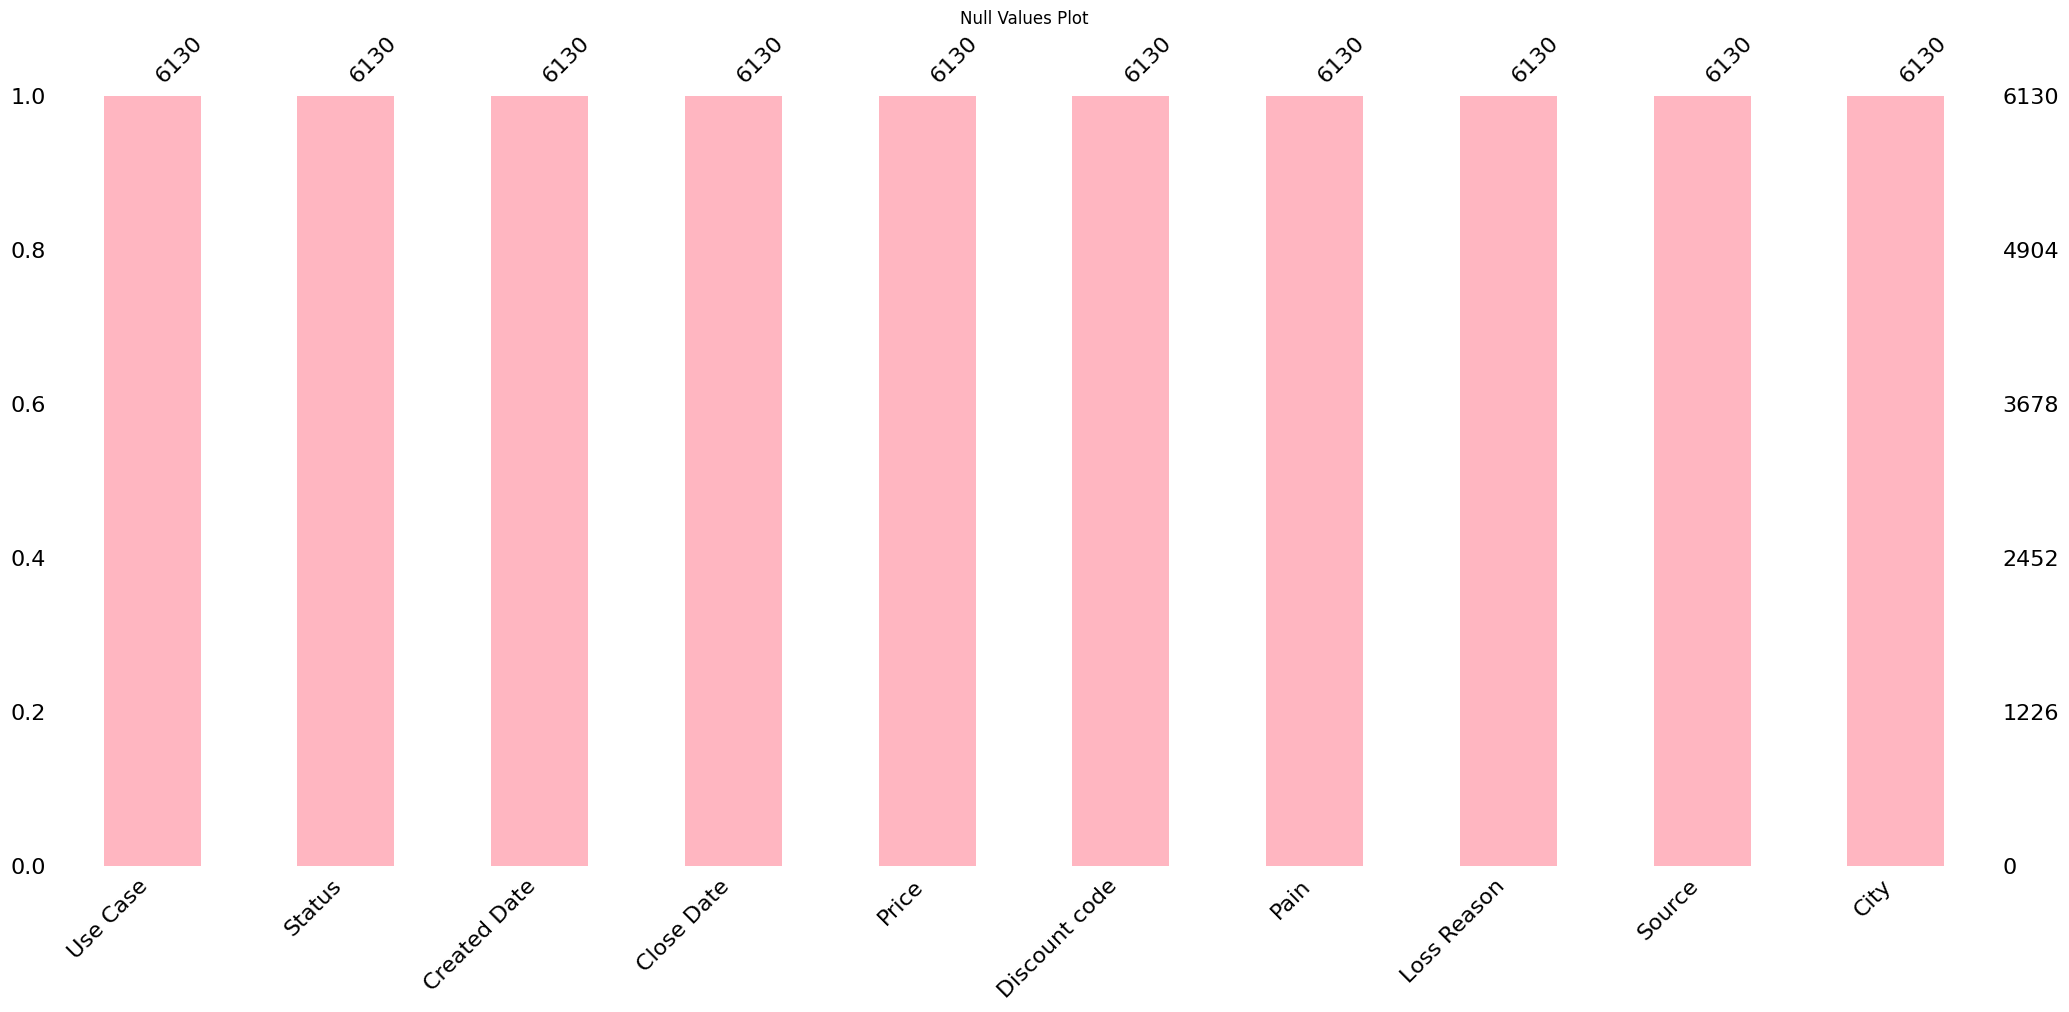

In [22]:
plt.title("Null Values Plot")
ms.bar(full_dataset_preprocessed, color = 'lightpink')

In [23]:
full_dataset_preprocessed['Created Date'] = pd.to_datetime(full_dataset_preprocessed['Created Date'], format="%Y-%m-%d")
full_dataset_preprocessed['Close Date'] = pd.to_datetime(full_dataset_preprocessed['Close Date'], format="%Y-%m-%d")

full_dataset_preprocessed['Created Year']= full_dataset_preprocessed['Created Date'].dt.year
full_dataset_preprocessed['Created Month']= full_dataset_preprocessed['Created Date'].dt.month
full_dataset_preprocessed['Close Year']= full_dataset_preprocessed['Close Date'].dt.year
full_dataset_preprocessed['Close Month']= full_dataset_preprocessed['Close Date'].dt.month

full_dataset_preprocessed = full_dataset_preprocessed.drop(['Created Date', 'Close Date'], axis = 1)

In [24]:
# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Use Case', 'Status', 'Discount code', 'Pain', 'Loss Reason', 'Source', 'City']

# Aplicar LabelEncoder a cada columna categórica
for column in categorical_columns:
    if column in full_dataset_preprocessed.columns:
        full_dataset_preprocessed[column] = label_encoder.fit_transform(full_dataset_preprocessed[column])

In [25]:
print(full_dataset_preprocessed.head())
full_dataset_preprocessed.to_csv("data/processed/full_dataset.csv", index=False)

   Use Case  Status  Price  Discount code  Pain  Loss Reason  Source  City  \
0         2       2  300.0             83     1            5       0     2   
1         3       1  150.0              2     1            7       0     2   
2         3       1  768.0             51     1            4       0     2   
3         1       2  240.0             22     0            5       0    15   
4         3       1  240.0             81     0            4       0     2   

   Created Year  Created Month  Close Year  Close Month  
0          2019             11        2019           11  
1          2019             11        2019           11  
2          2019             11        2019           11  
3          2019              5        2019            5  
4          2019             11        2019           11  


### Step 5: Statistics Summary

In [26]:
full_dataset_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
Use Case,6130.0,1.669984,0.889505,0.0,1.0,1.0,2.0,4.0
Status,6130.0,1.682382,0.802041,0.0,1.0,2.0,2.0,5.0
Price,6130.0,1247.559869,10067.638977,0.0,240.0,360.0,768.0,399304.0
Discount code,6130.0,35.320881,36.739597,0.0,2.0,20.0,66.0,111.0
Pain,6130.0,0.938662,0.590751,0.0,1.0,1.0,1.0,3.0
Loss Reason,6130.0,4.293475,1.697129,0.0,4.0,5.0,5.0,7.0
Source,6130.0,0.188581,0.391207,0.0,0.0,0.0,0.0,1.0
City,6130.0,4.945677,5.368869,0.0,2.0,2.0,5.0,19.0
Created Year,6130.0,2018.701794,0.511394,2018.0,2018.0,2019.0,2019.0,2020.0
Created Month,6130.0,7.083034,3.311597,1.0,4.0,7.0,10.0,12.0


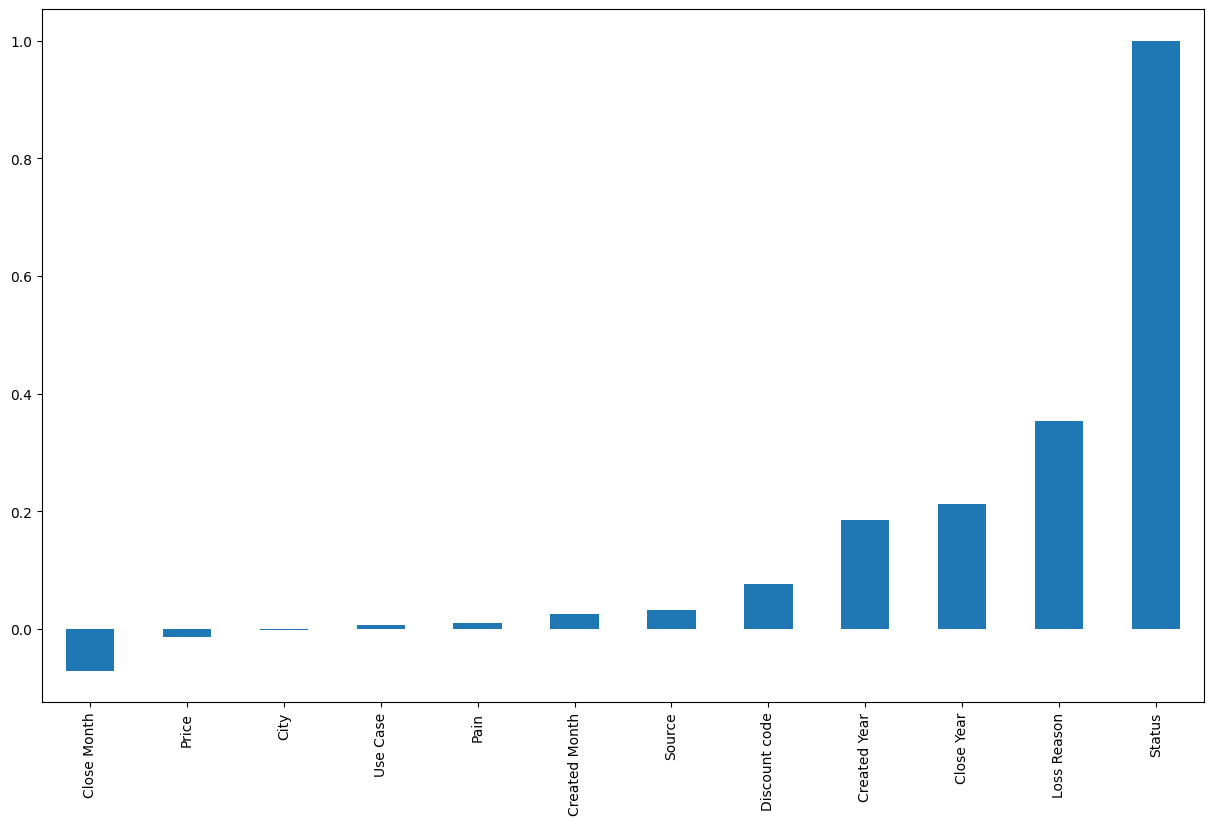

In [27]:
fig = plt.figure(figsize=(15,9))
full_dataset_preprocessed.corr()['Status'].sort_values(ascending=True).plot(kind='bar')
plt.show()

In [28]:
class_label = 'Status'
X = full_dataset_preprocessed.drop([class_label], axis=1)
y = full_dataset_preprocessed[class_label]

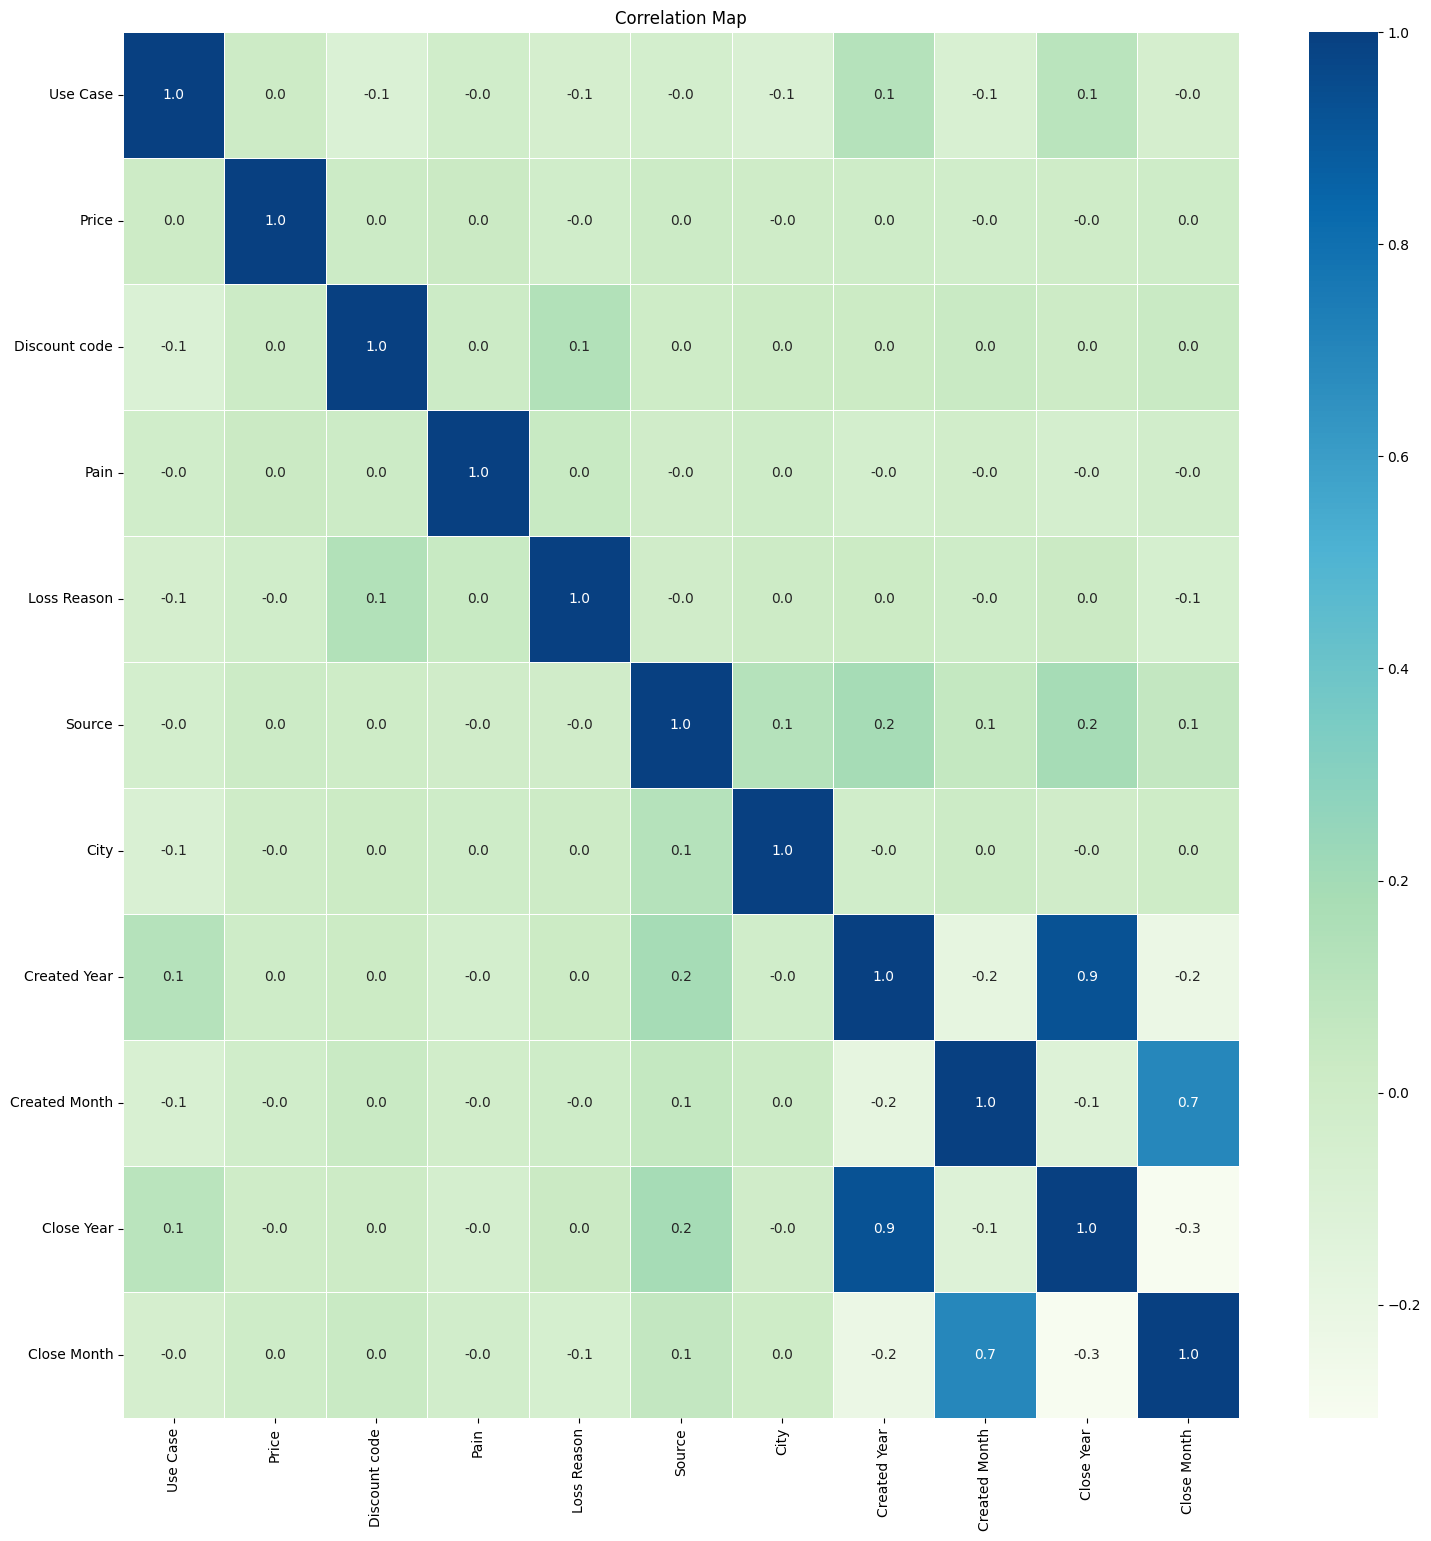

In [29]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(X.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, cmap='GnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [30]:
print(full_dataset_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Use Case       6130 non-null   int64  
 1   Status         6130 non-null   int64  
 2   Price          6130 non-null   float64
 3   Discount code  6130 non-null   int64  
 4   Pain           6130 non-null   int64  
 5   Loss Reason    6130 non-null   int64  
 6   Source         6130 non-null   int64  
 7   City           6130 non-null   int64  
 8   Created Year   6130 non-null   int32  
 9   Created Month  6130 non-null   int32  
 10  Close Year     6130 non-null   int32  
 11  Close Month    6130 non-null   int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 479.0 KB
None
